In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro 

# Machine Learning Project

ID:	Customer ID	 	 	 	 	 	 	 
- Age:	Customer's age in completed years (quantitative)	 	 	 	 	 
- Experience:	#years of professional experience (quantitative) 	 	 	 	 	 
- Income:	Annual income of the customer (in thousands) (quantitative) 	 	 	 	 	 
- ZIPCode: Home Address ZIP code. (categorical)
- Family:	Family size of the customer (quantitative) 	 	 	 	 
- CCAvg:	Avg. spending on credit cards per month (in thousands) (quantitative)
- Education:	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional (categorical)
- Mortgage:	Value of house mortgage if any. (in thousands) (quantitative)
- Personal Loan:	Did this customer accept the personal loan offered in the last campaign? (Class) 
- Securities Account:	Does the customer have a securities account with the bank? (categorical)
- CD Account:	Does the customer have a certificate of deposit (CD) account with the bank? (categorical)
- Online:	Does the customer use internet banking facilities? (categorical)
- CreditCard:	Does the customer use a credit card issued by UniversalBank? (categorical)

## Loading the data

In [4]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')
df.head(5)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

## Cleaning the data

### Changing the names of columns and creating the copy of dataframe

In [5]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
new_cols = ['id','age','experience','income','zip','family_size','ccavg','education','mortgage','personal_loan',
            'sec_acc','cd_acc','online','cred_card']

In [7]:
df2 = df.copy()

In [8]:
df2.columns = new_cols

In [9]:
df2.columns

Index(['id', 'age', 'experience', 'income', 'zip', 'family_size', 'ccavg',
       'education', 'mortgage', 'personal_loan', 'sec_acc', 'cd_acc', 'online',
       'cred_card'],
      dtype='object')

In [98]:
df2.head(10)

id  age  experience  income    zip  family_size  ccavg  education  \
0   1   25           1      49  91107            4    1.6          1   
1   2   45          19      34  90089            3    1.5          1   
2   3   39          15      11  94720            1    1.0          1   
3   4   35           9     100  94112            1    2.7          2   
4   5   35           8      45  91330            4    1.0          2   
5   6   37          13      29  92121            4    0.4          2   
6   7   53          27      72  91711            2    1.5          2   
7   8   50          24      22  93943            1    0.3          3   
8   9   35          10      81  90089            3    0.6          2   
9  10   34           9     180  93023            1    8.9          3   

   mortgage  personal_loan  sec_acc  cd_acc  online  cred_card  
0         0              0        1       0       0          0  
1         0              0        1       0       0          0  
2         0              0        0       0       0          0  
3         0              0        0       0       0          0  
4         0              0        0       0       0          1  
5       155              0        0       0       1          0  
6         0              0        0       0       1          0  
7         0              0        0       0       0          1  
8       104              0        0       0       1          0  
9         0              1        0       0       0          0

In [10]:
df2.shape

(5000, 14)

In [11]:
df2.describe()

id          age   experience       income           zip  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

       family_size        ccavg    education     mortgage  personal_loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937913     1.881000    56.498800       0.096000   
std       1.147663     1.747666     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

           sec_acc      cd_acc       online    cred_card  
count  5000.000000  5000.00000  5000.000000  5000.000000  
mean      0.104400     0.06040     0.596800     0.294000  
std       0.305809     0.23825     0.490589     0.455637  
min       0.000000     0.00000     0.000000     0.000000  
25%       0.000000     0.00000     0.000000     0.000000  
50%       0.000000     0.00000     1.000000     0.000000  
75%       0.000000     0.00000     1.000000     1.000000  
max       1.000000     1.00000     1.000000     1.000000

Identified that experience has negative values

### Getting rid of experience, which is less that 0

In [12]:
df2 = df2[df2.experience >= 0]
df2.shape

(4948, 14)

In [13]:
df2.isna().sum()

id               0
age              0
experience       0
income           0
zip              0
family_size      0
ccavg            0
education        0
mortgage         0
personal_loan    0
sec_acc          0
cd_acc           0
online           0
cred_card        0
dtype: int64

In [103]:
df2.dtypes

id                 int64
age                int64
experience         int64
income             int64
zip                int64
family_size        int64
ccavg            float64
education          int64
mortgage           int64
personal_loan      int64
sec_acc            int64
cd_acc             int64
online             int64
cred_card          int64
dtype: object

## Getting the histogram and pie of class imbalance

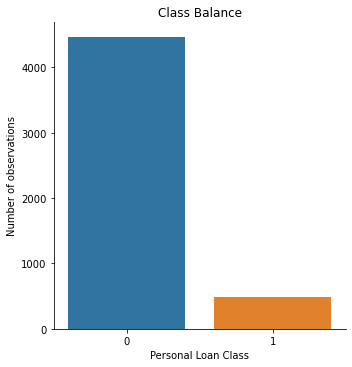

In [85]:
sns.catplot(data=df2, x="personal_loan", kind="count")
plt.title('Class Balance')
plt.xlabel('Personal Loan Class')
plt.ylabel('Number of observations')
plt.show()

In [119]:
persLoan = df2.personal_loan.value_counts()

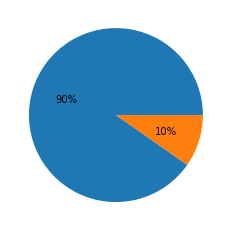

In [120]:
plt.pie(persLoan, autopct='%.0f%%')
plt.show()

## Check the mortgage feature

Checking in order to see, if the mortgage feature is relevant, due to distribution being not normal

<AxesSubplot:xlabel='mortgage', ylabel='income'>

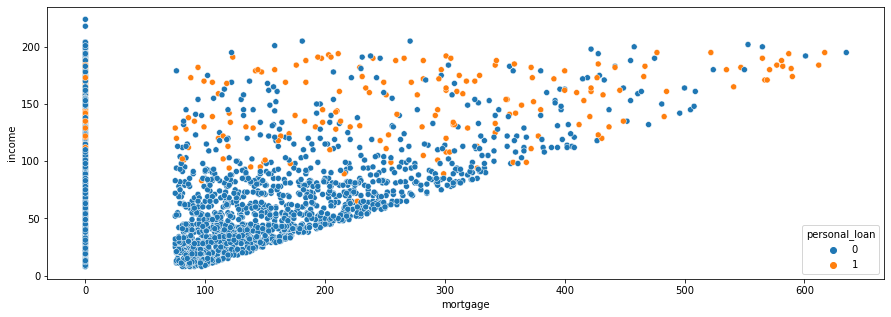

In [106]:
fig, ax = plt.subplots(figsize=(15,5))
sns.scatterplot(data=df2, x='mortgage', y='income', hue='personal_loan')

### Checking the class balance in numeric features

In [120]:
num_f = df2[['age','experience','income','ccavg','mortgage','personal_loan']]

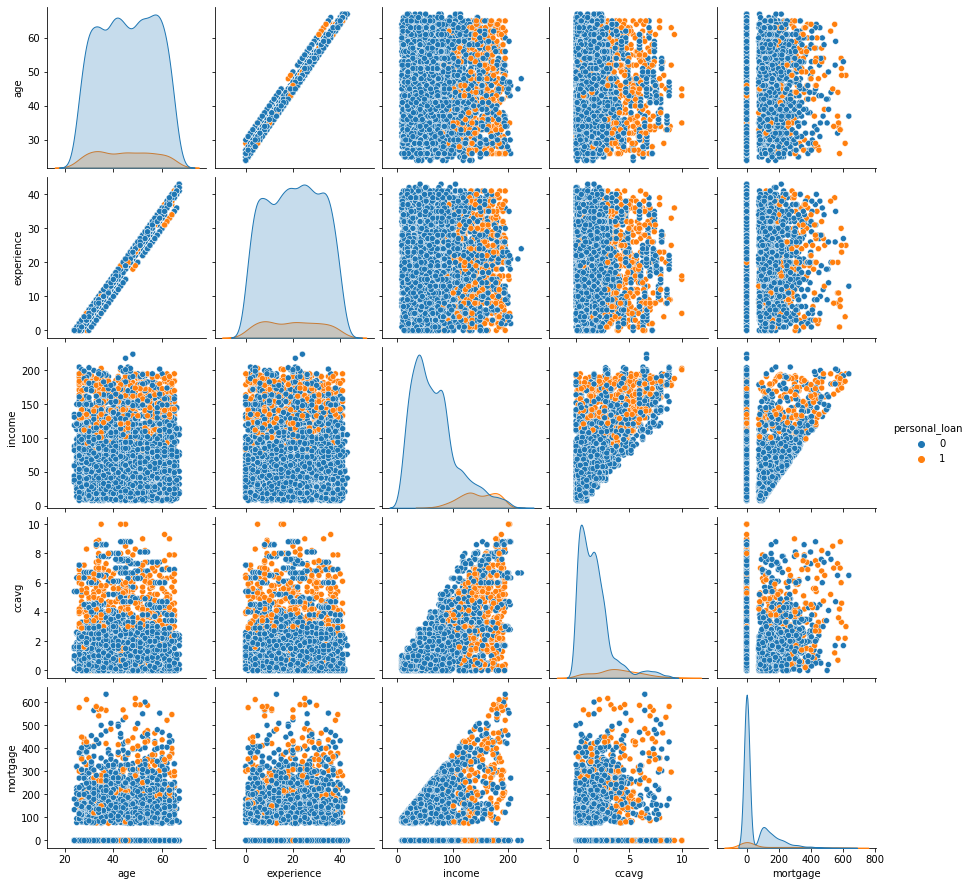

In [121]:
sns.pairplot(num_f, hue='personal_loan')

### Checking the class balance in all features

In [108]:
df_pair = df2.drop(['id','zip'], axis=1)

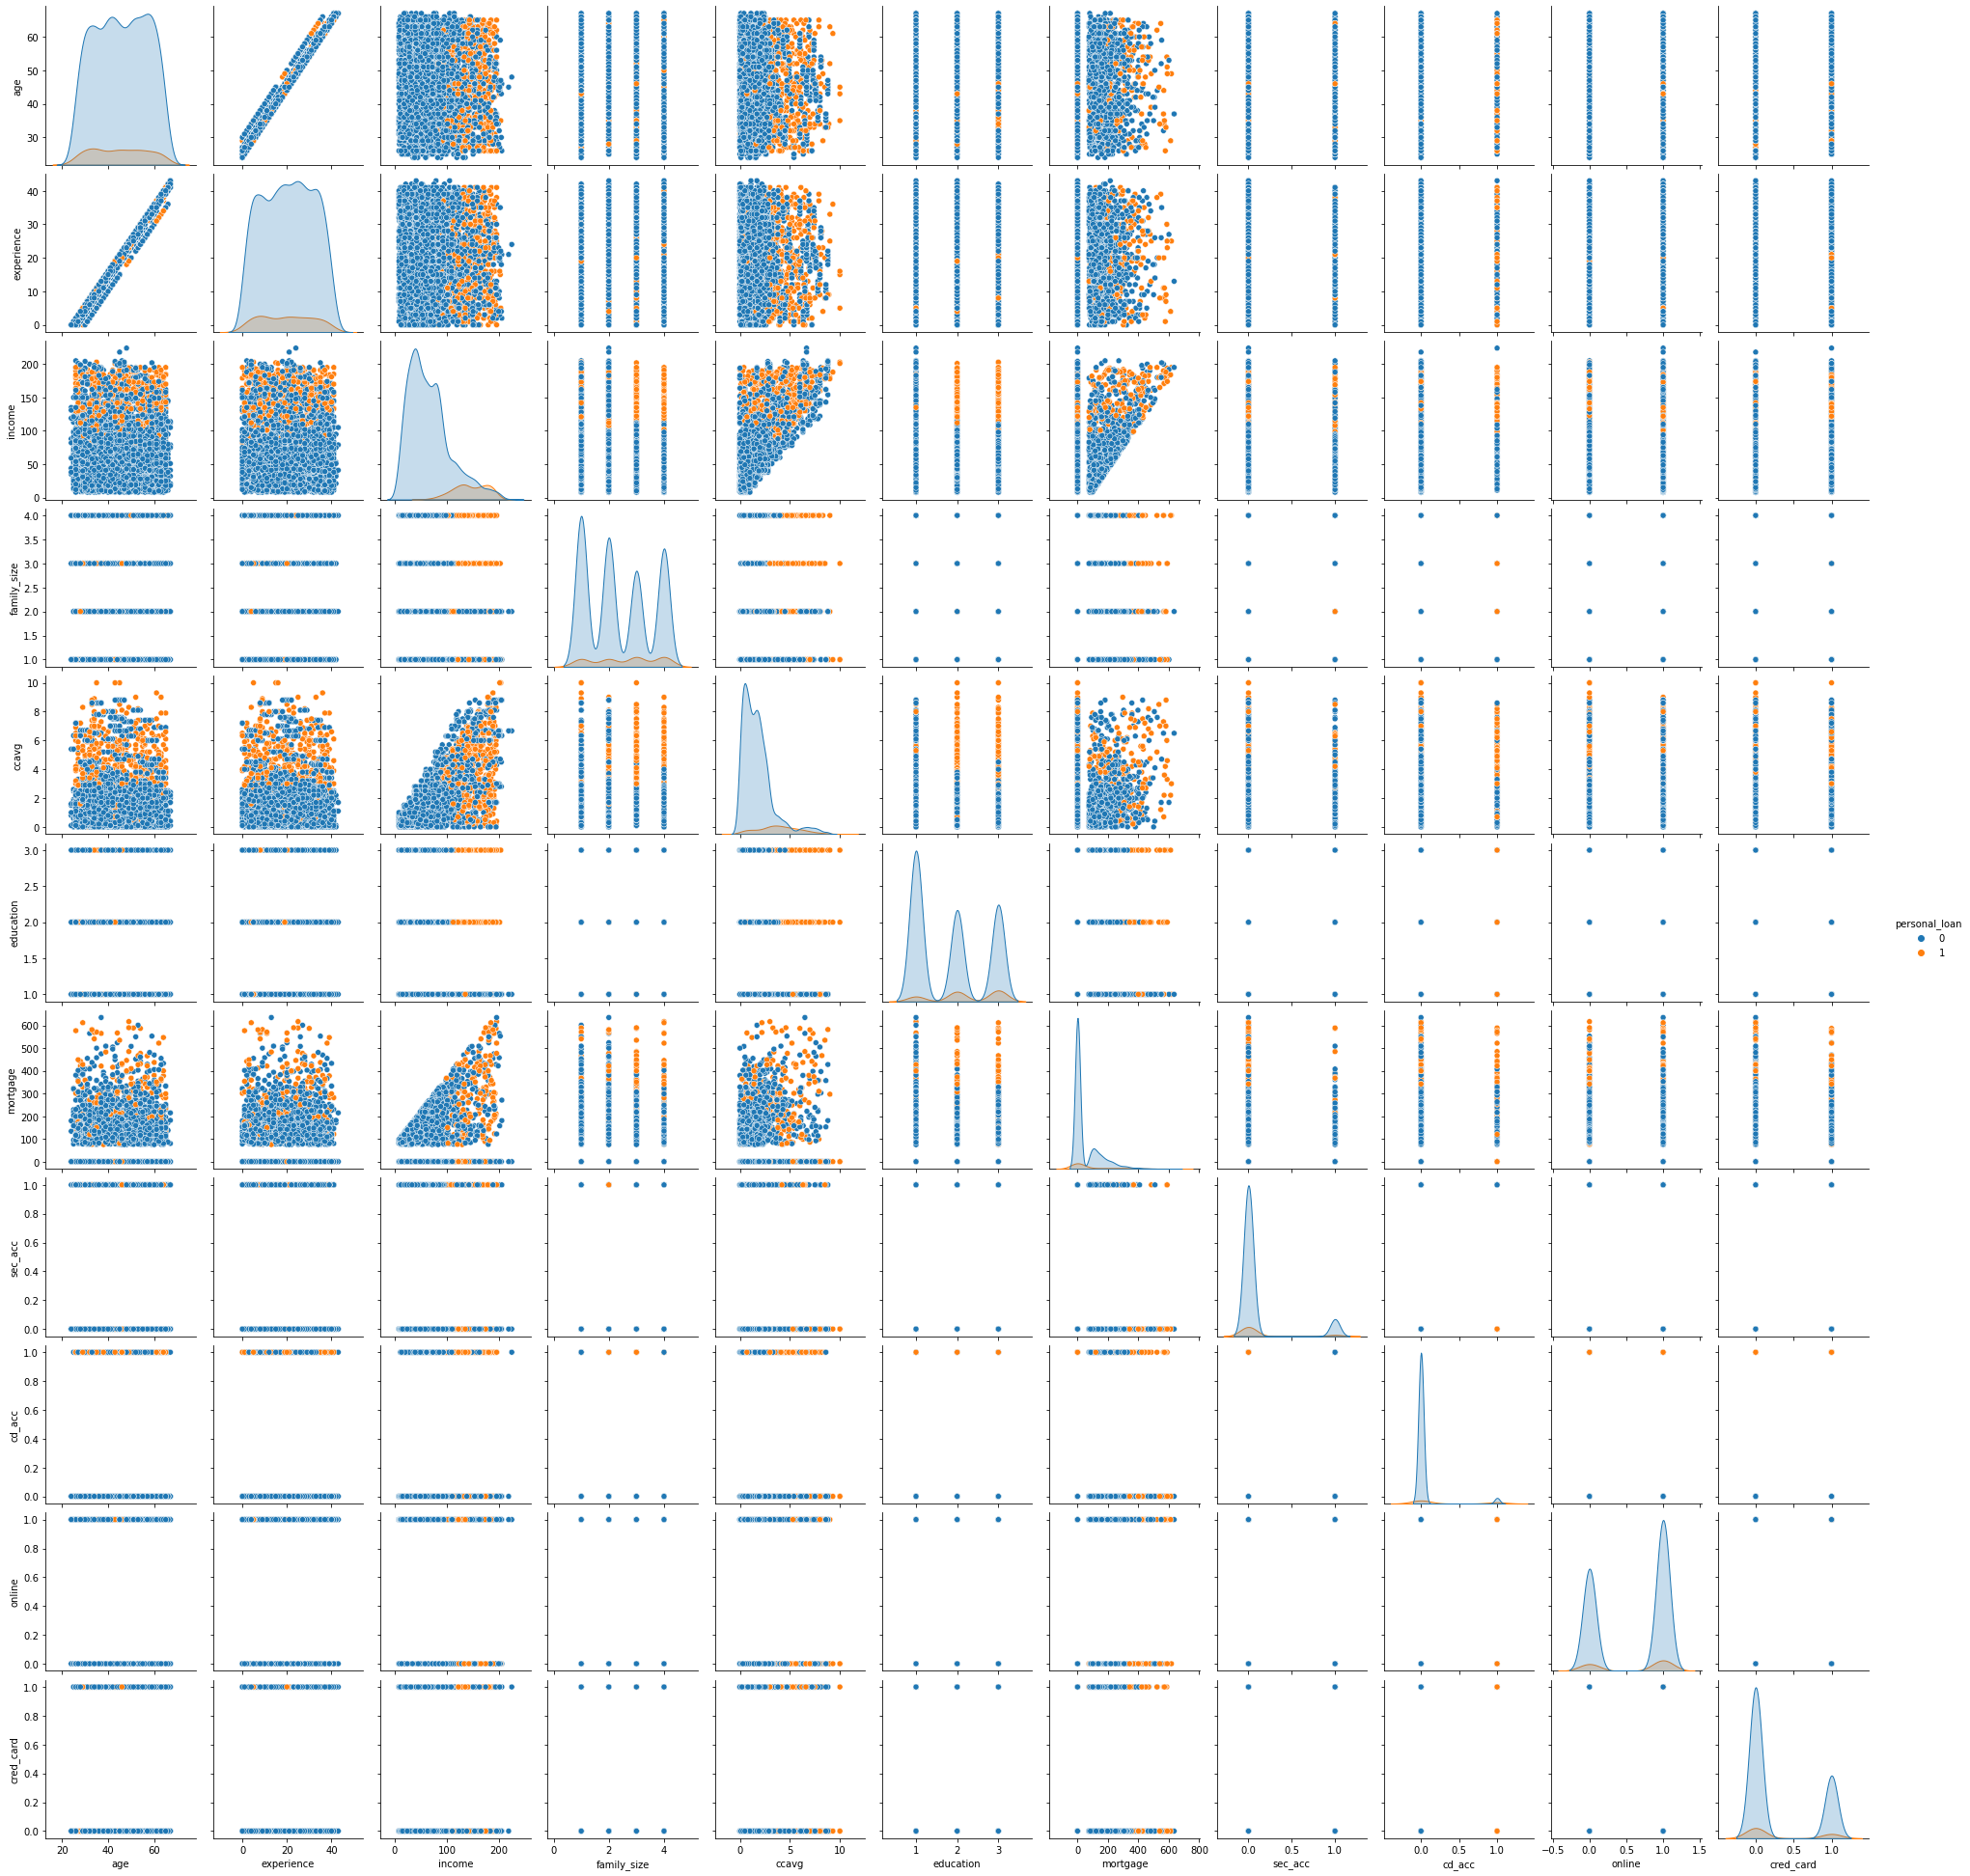

In [109]:
sns.pairplot(df_pair, hue='personal_loan')

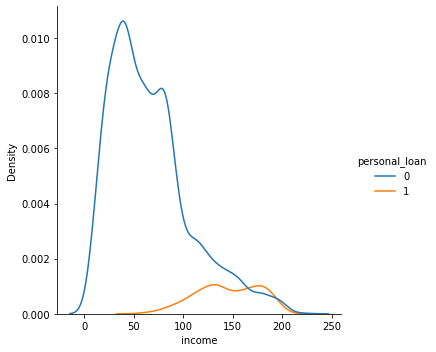

In [115]:
sns.displot(data=df2, x='income', hue='personal_loan', kind='kde')

## Histograms for the poster

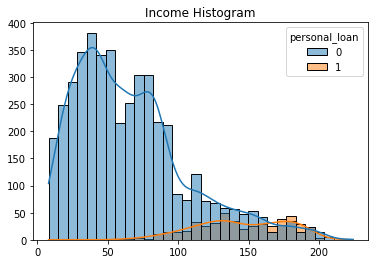

In [97]:
sns.histplot(data=df2, x='income', kde=True, hue='personal_loan')
plt.title('Income Histogram')
plt.xlabel('')
plt.ylabel('')
plt.show()

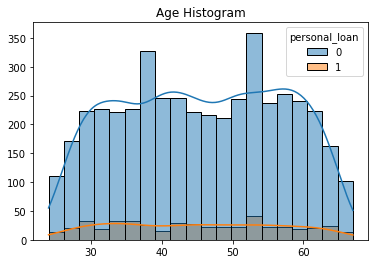

In [98]:
sns.histplot(data=df2, x='age', kde=True, hue='personal_loan')
plt.title('Age Histogram')
plt.xlabel('')
plt.ylabel('')
plt.show()

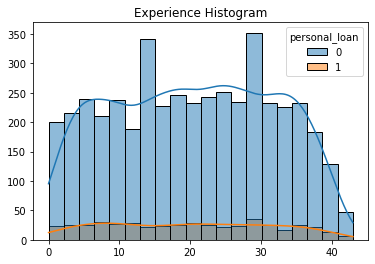

In [99]:
sns.histplot(data=df2, x='experience', kde=True, hue='personal_loan')
plt.title('Experience Histogram')
plt.xlabel('')
plt.ylabel('')
plt.show()

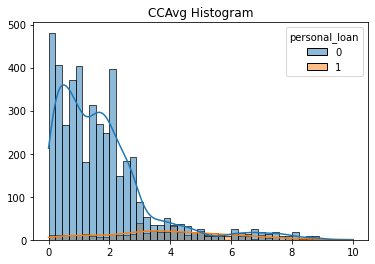

In [100]:
sns.histplot(data=df2, x='ccavg', kde=True, hue='personal_loan')
plt.title('CCAvg Histogram')
plt.xlabel('')
plt.ylabel('')
plt.show()

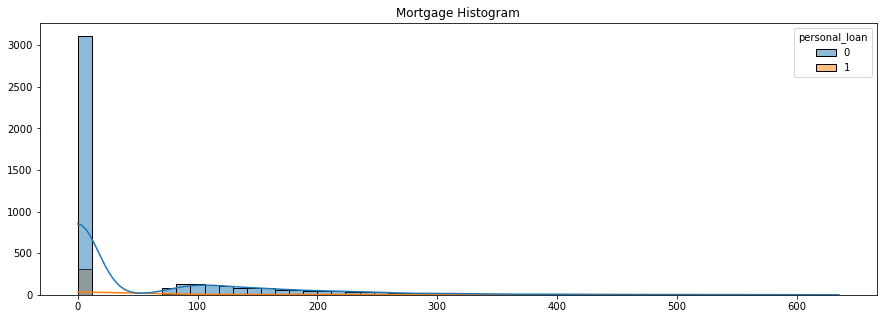

In [101]:
fug, ax = plt.subplots(figsize=(15,5))

sns.histplot(data=df2, x='mortgage', kde=True, hue='personal_loan')
plt.title('Mortgage Histogram')
plt.xlabel('')
plt.ylabel('')
plt.show()

<AxesSubplot:xlabel='Income', ylabel='Count'>

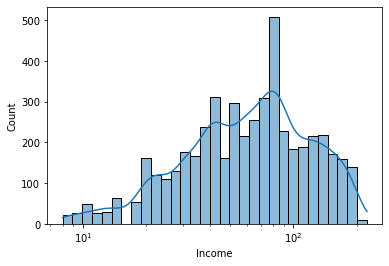

In [11]:
sns.histplot(data=df, x='Income', kde=True, log_scale=True)


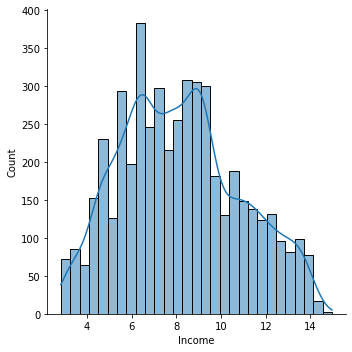

In [15]:
sns.displot(np.sqrt(df['Income']), kde=True)

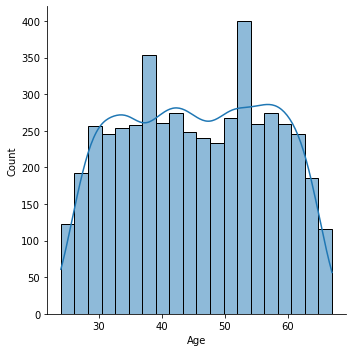

In [17]:
sns.displot(df['Age'], kde=True)

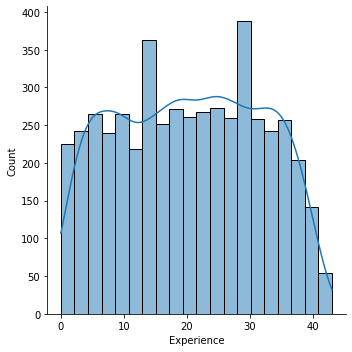

In [18]:
sns.displot(df['Experience'], kde=True)

## Normalization for income

### With log

In [121]:
df4 = df2.copy()

In [122]:
df4.head(3)

id  age  experience  income    zip  family_size  ccavg  education  \
0   1   25           1      49  91107            4    1.6          1   
1   2   45          19      34  90089            3    1.5          1   
2   3   39          15      11  94720            1    1.0          1   

   mortgage  personal_loan  sec_acc  cd_acc  online  cred_card  
0         0              0        1       0       0          0  
1         0              0        1       0       0          0  
2         0              0        0       0       0          0

In [123]:
df4.drop(['id','zip'], axis=1, inplace=True)

In [124]:
df4.head(2)

age  experience  income  family_size  ccavg  education  mortgage  \
0   25           1      49            4    1.6          1         0   
1   45          19      34            3    1.5          1         0   

   personal_loan  sec_acc  cd_acc  online  cred_card  
0              0        1       0       0          0  
1              0        1       0       0          0

In [126]:
df4['income'] = np.log(df4['income'])

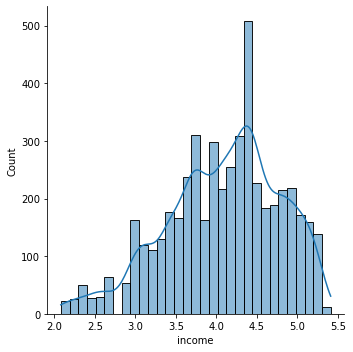

In [127]:
sns.displot(df4['income'], kde=True)

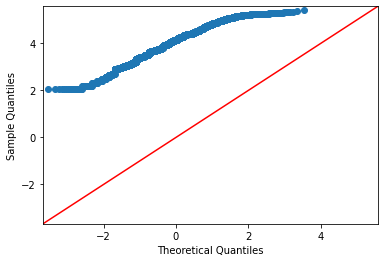

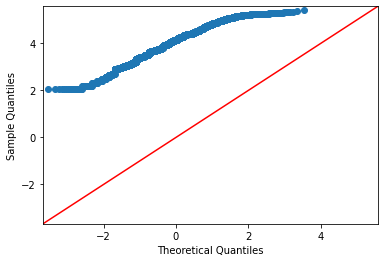

In [131]:
sm.qqplot(df4.income, line='45')

### With cube root

In [134]:
shapiro(df4['income'])

ShapiroResult(statistic=0.9769726395606995, pvalue=1.419222590843815e-27)

In [147]:
df5 = df2.copy()

In [148]:
df5['income'] = np.cbrt(df5['income'])

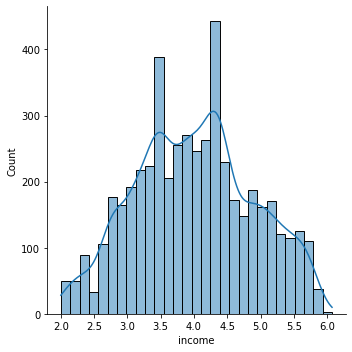

In [149]:
sns.displot(df5['income'], kde=True)

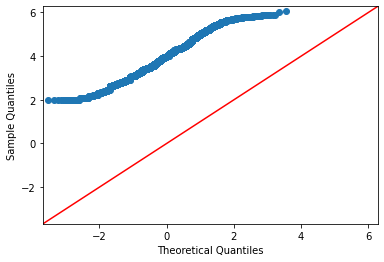

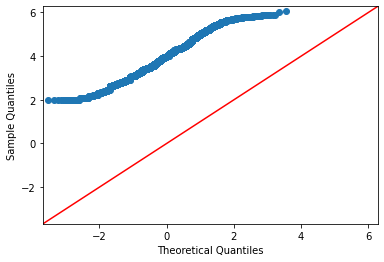

In [150]:
sm.qqplot(df5.income, line='45')

In [152]:
shapiro(df5['income'])

ShapiroResult(statistic=0.9878952503204346, pvalue=3.397823696233423e-20)

### With square root

In [153]:
df6 = df2.copy()

In [154]:
df6['income'] = np.sqrt(df6['income'])

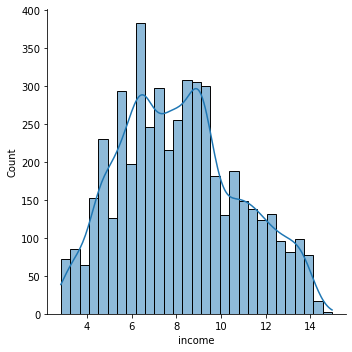

In [156]:
sns.displot(df6['income'], kde=True)

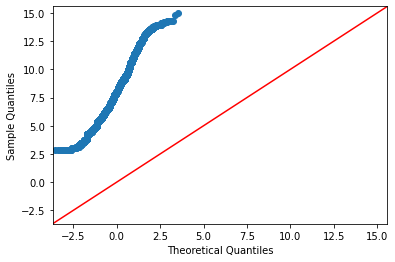

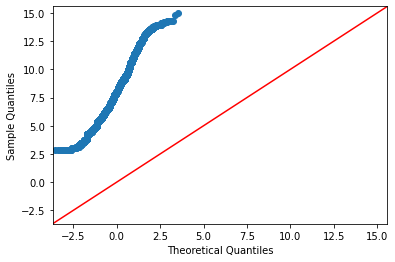

In [158]:
sm.qqplot(df6.income, line='45')

In [159]:
shapiro(df6['income'])

ShapiroResult(statistic=0.9812009930610657, pvalue=4.0945107915110932e-25)

## Normalization for income

### With log

In [160]:
df4['ccavg'] = np.log(df4['ccavg'])

/Users/Sergey/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


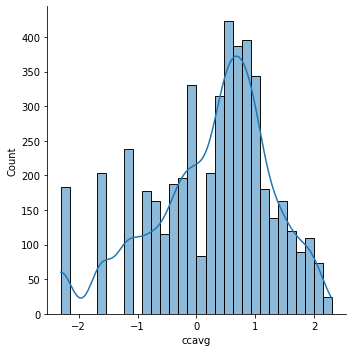

In [161]:
sns.displot(df4['ccavg'], kde=True)

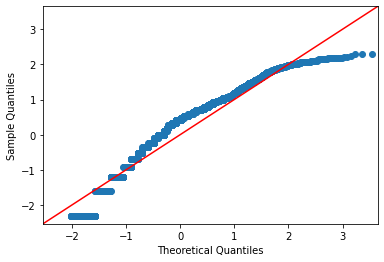

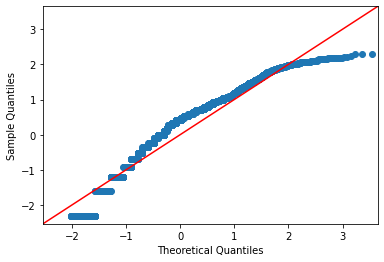

In [162]:
sm.qqplot(df4.ccavg, line='45')

### With square

In [163]:
df5['ccavg'] = np.sqrt(df5['ccavg'])

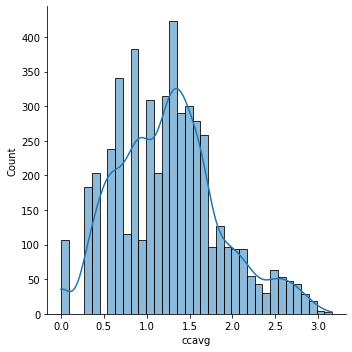

In [164]:
sns.displot(df5['ccavg'], kde=True)

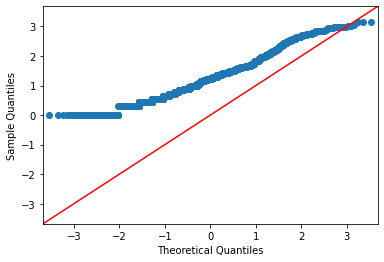

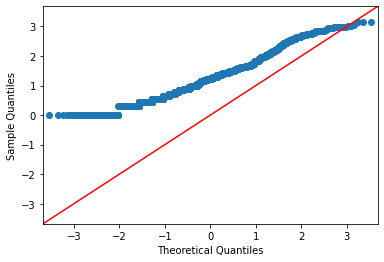

In [165]:
sm.qqplot(df5.ccavg, line='45')

## With cube

In [166]:
df6['ccavg'] = np.cbrt(df6['ccavg'])

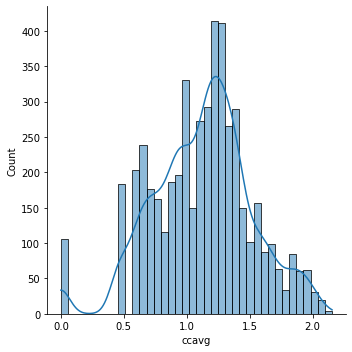

In [167]:
sns.displot(df6['ccavg'], kde=True)

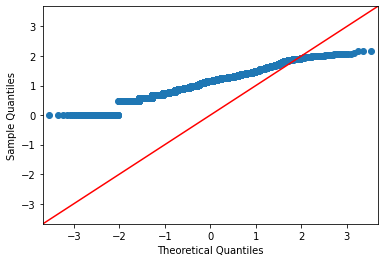

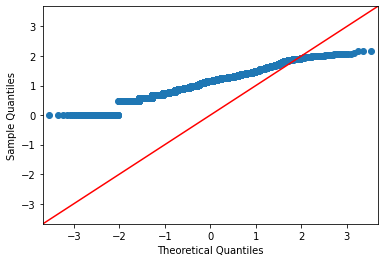

In [168]:
sm.qqplot(df6.ccavg, line='45')

## Mortgage transfornation into categorical data

In [169]:
df7 = df2.copy()

In [170]:
df7.drop(['id','zip'], axis=1, inplace=True)

In [171]:
len(df7)

4948

In [172]:
df7.head(2)

age  experience  income  family_size  ccavg  education  mortgage  \
0   25           1      49            4    1.6          1         0   
1   45          19      34            3    1.5          1         0   

   personal_loan  sec_acc  cd_acc  online  cred_card  
0              0        1       0       0          0  
1              0        1       0       0          0

In [175]:
df7.iloc[1,6]

0

In [176]:
for i in range(0,len(df7)):
    if df7.iloc[i,6] == 0:
        df7.iloc[i,6] = 0
    else:
        df7.iloc[i,6] = 1

In [178]:
df7.mortgage.value_counts()

0    3422
1    1526
Name: mortgage, dtype: int64

<AxesSubplot:xlabel='mortgage', ylabel='Count'>

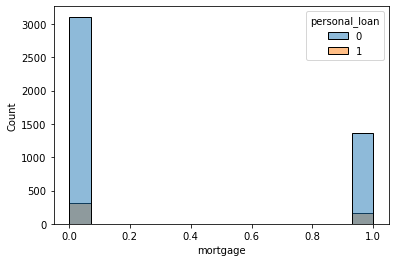

In [179]:
sns.histplot(df7, x='mortgage', hue='personal_loan')

<AxesSubplot:>

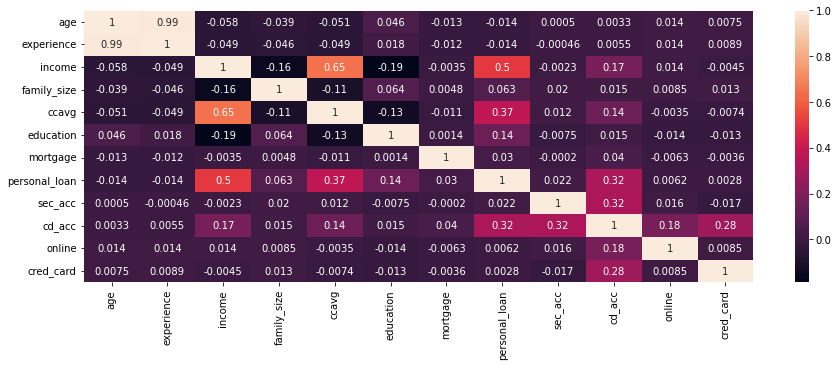

In [180]:
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(df7.corr(), annot=True)

## Correlation of all features

In [45]:
df.drop(['ZIP Code','ID'], axis=1, inplace=True)

<AxesSubplot:>

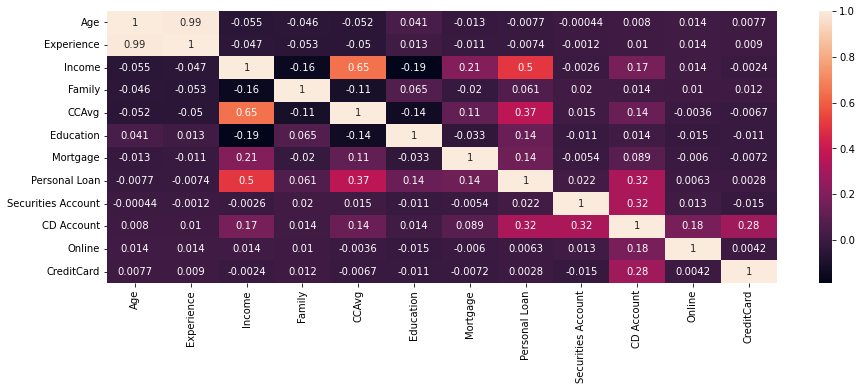

In [46]:
ifg, ax = plt.subplots(figsize=(15,5))

sns.heatmap(df.corr(), annot=True)

### Checking the income and ccavg features with classes

<AxesSubplot:xlabel='CCAvg', ylabel='Income'>

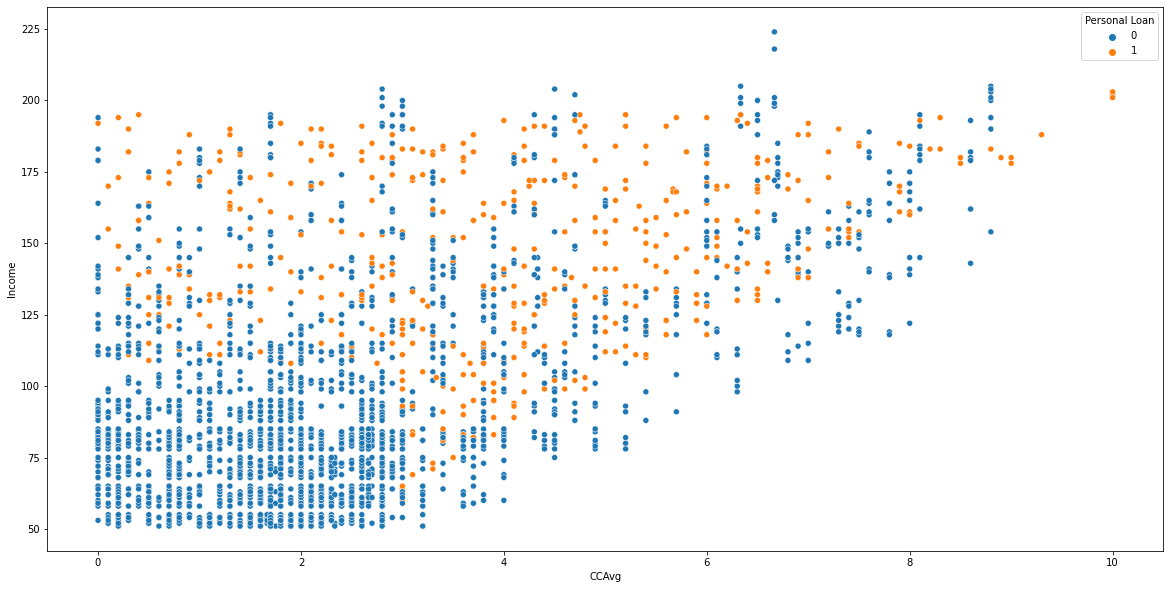

In [49]:
fig, ax = plt.subplots(figsize=(20,10))

sns.scatterplot(data=df, x='CCAvg', y='Income', hue='Personal Loan')

<AxesSubplot:xlabel='CCAvg', ylabel='Income'>

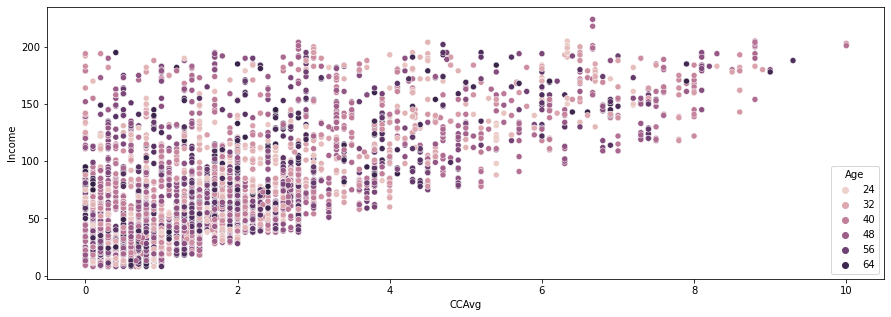

In [28]:
fig, ax = plt.subplots(figsize=(15,5))

sns.scatterplot(data=df, x='CCAvg', y='Income', hue='Age')

## Checking how many people have income less than 50 thousands

In [43]:
less_than50 = df[df['Income'] <= 50]
less_than50 = less_than50[less_than50['Personal Loan'] == 1]

In [44]:
less_than50

Empty DataFrame
Columns: [ID, Age, Experience, Income, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

In [45]:
df = df[df['Income'] > 50]

<AxesSubplot:xlabel='Income', ylabel='Count'>

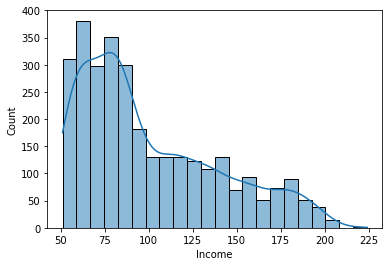

In [46]:
sns.histplot(data=df, x='Income', kde=True)

<AxesSubplot:xlabel='Income', ylabel='Count'>

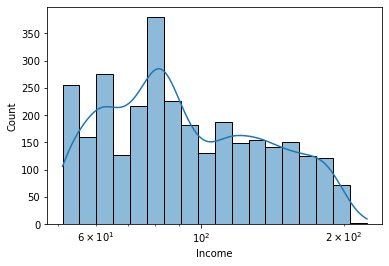

In [47]:
sns.histplot(data=df, x='Income', kde=True, log_scale=True)

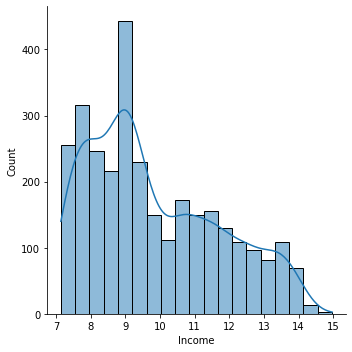

In [48]:
sns.displot(np.sqrt(df['Income']), kde=True)

## Checking how many people have income less than 60 k

In [52]:
less_than60 = df[df['Income'] < 60]
less_than60 = less_than60[less_than60['Personal Loan'] == 1]

In [53]:
less_than60.head(10)

Empty DataFrame
Columns: [ID, Age, Experience, Income, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

In [54]:
df = df[df['Income'] > 59]

<AxesSubplot:xlabel='Income', ylabel='Count'>

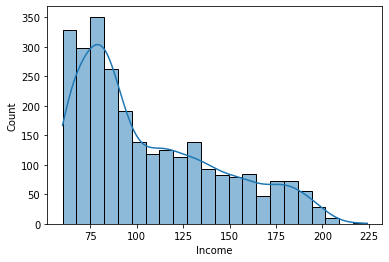

In [55]:
sns.histplot(data=df, x='Income', kde=True)

<AxesSubplot:xlabel='Income', ylabel='Count'>

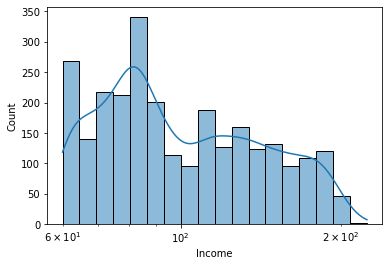

In [56]:
sns.histplot(data=df, x='Income', kde=True, log_scale=True)

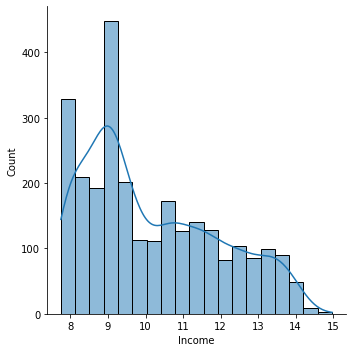

In [57]:
sns.displot(np.sqrt(df['Income']), kde=True)

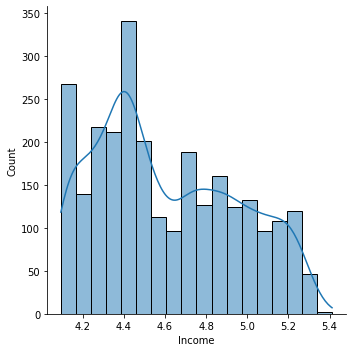

In [60]:
sns.displot(np.log(df['Income']), kde=True)

## It was identified that people with less than 60k do not accept the loan. It means it can be the root for the decision trees

<AxesSubplot:xlabel='CCAvg', ylabel='Income'>

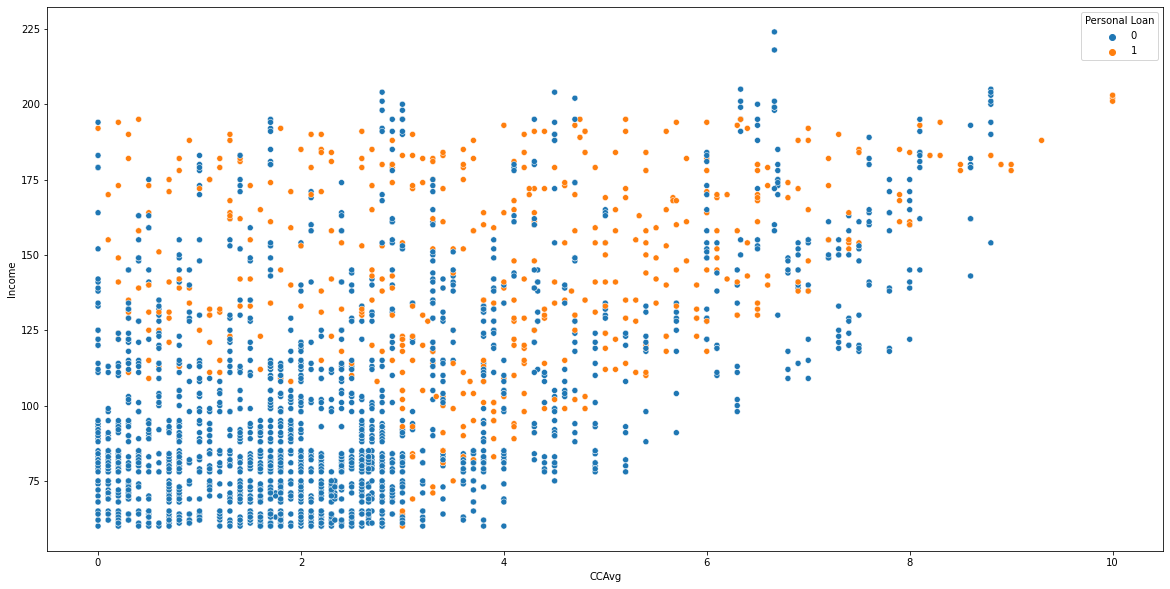

In [58]:
fig, ax = plt.subplots(figsize=(20,10))

sns.scatterplot(data=df, x='CCAvg', y='Income', hue='Personal Loan')

### Normalization of ccavg feature

/Users/Sergey/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


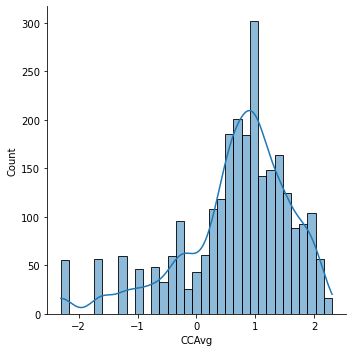

In [66]:
sns.displot(np.log(df['CCAvg']), kde=True)

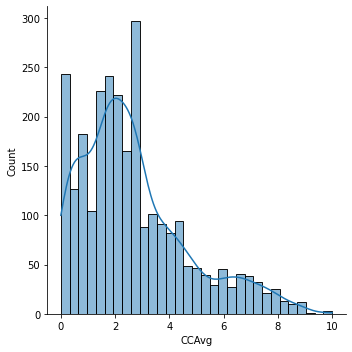

In [67]:
sns.displot(df['CCAvg'], kde=True)

<AxesSubplot:>

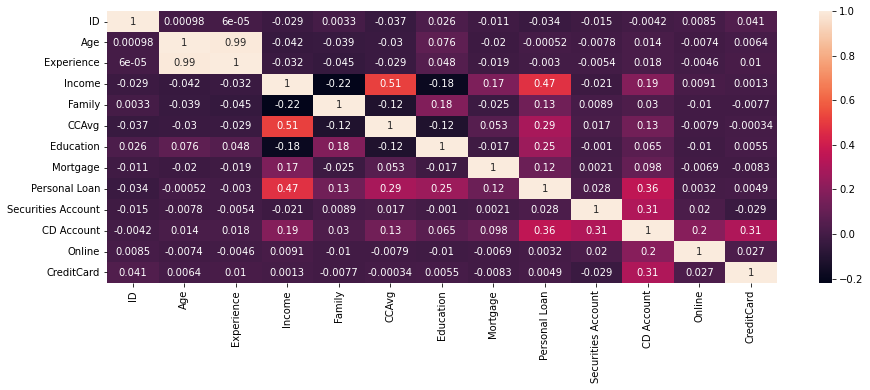

In [71]:
fig, ax = plt.subplots(figsize=(15,5))

sns.heatmap(df.corr(), annot=True)

### Vizualising income feature with classes to see where they intercept

In [72]:
loan_yes = df[df['Personal Loan'] == 1]
loan_no = df[df['Personal Loan'] == 0]

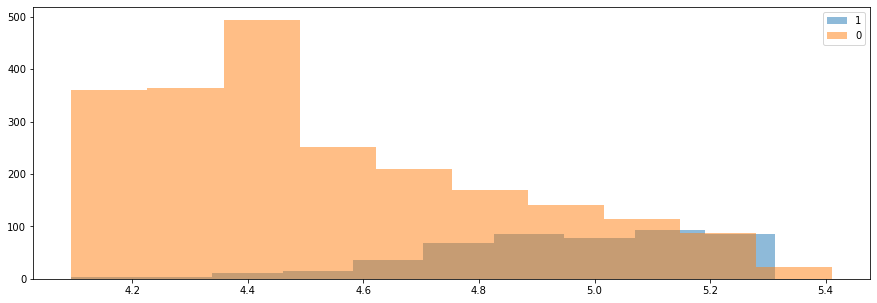

In [84]:
fig, ax = plt.subplots(figsize=(15,5))

plt.hist(np.log(loan_yes['Income']), alpha=0.5, label='1')
plt.hist(np.log(loan_no['Income']), alpha=0.5, label='0')
plt.legend(loc='upper right')
plt.show()

/Users/Sergey/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/Sergey/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

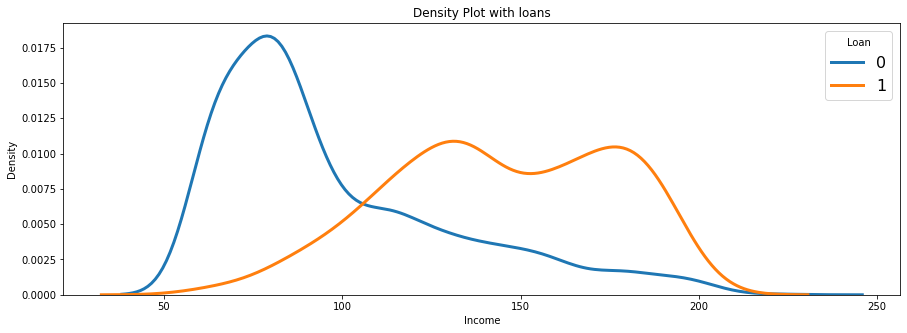

In [87]:
fig, ax = plt.subplots(figsize=(15,5))

values = [0,1]
# Iterate through the five airlines
for i in values:
    # Subset to the airline
    subset = df[df['Personal Loan'] == i]
    
    # Draw the density plot
    sns.distplot(subset['Income'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = i)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Loan')
plt.title('Density Plot with loans')
plt.xlabel('Income')
plt.ylabel('Density')

/Users/Sergey/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/Sergey/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

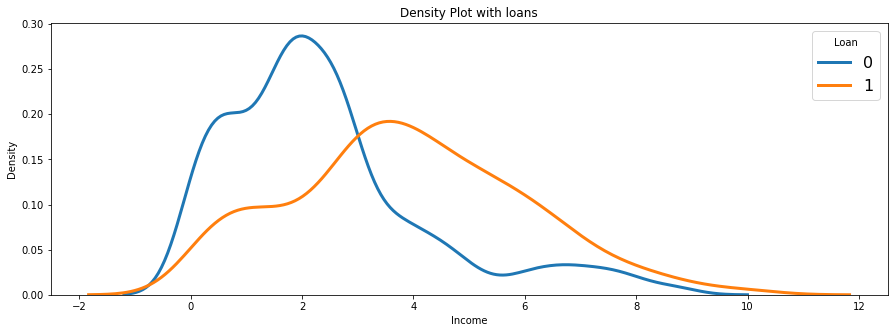

In [88]:
fig, ax = plt.subplots(figsize=(15,5))

values = [0,1]
# Iterate through the five airlines
for i in values:
    # Subset to the airline
    subset = df[df['Personal Loan'] == i]
    
    # Draw the density plot
    sns.distplot(subset['CCAvg'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = i)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Loan')
plt.title('Density Plot with loans')
plt.xlabel('Income')
plt.ylabel('Density')

In [82]:
yes_mean = loan_yes['Income'].mean()
yes_std = np.std(loan_yes['Income'])

In [83]:
no_mean = loan_yes['Income'].mean()
no_std = np.std(loan_yes['Income'])

## Checking the balance of class if people with income less than 60k were not in the dataset

In [59]:
df['Personal Loan'].value_counts()

0    2212
1     480
Name: Personal Loan, dtype: int64

## Feature Selection for the models

In [182]:
df7.head(4)

age  experience  income  family_size  ccavg  education  mortgage  \
0   25           1      49            4    1.6          1         0   
1   45          19      34            3    1.5          1         0   
2   39          15      11            1    1.0          1         0   
3   35           9     100            1    2.7          2         0   

   personal_loan  sec_acc  cd_acc  online  cred_card  
0              0        1       0       0          0  
1              0        1       0       0          0  
2              0        0       0       0          0  
3              0        0       0       0          0

In [183]:
df_selection = df7[['experience','ccavg','family_size','education','mortgage','sec_acc','cd_acc','online',
                    'cred_card','personal_loan']]

In [184]:
X_selection = df_selection.iloc[:,:-1].values
Y_selection = df_selection.iloc[:,-1].values

In [187]:
X_train_sel, X_test_sel, Y_train_sel, Y_test_sel = train_test_split(X_selection, Y_selection, test_size=0.3, 
                                                                    random_state=42, stratify=Y_selection)

In [190]:
Y_train_sel

array([0, 0, 0, ..., 0, 0, 0])

## Saving feature selected

In [192]:
np.savetxt("X_train_sel.csv", X_train_sel, delimiter=",")
np.savetxt("X_test_sel.csv", X_test_sel, delimiter=",")
np.savetxt("y_train_sel.csv", Y_train_sel, delimiter=",")
np.savetxt("y_test_sel.csv", Y_test_sel, delimiter=",")

## Handling imbalanced data with SMOTE

### Oversampling

In [34]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [36]:
X = df3.iloc[:,:-1].values
y = df3.iloc[:,-1].values

In [37]:
X

array([[25.,  1., 49., ...,  0.,  0.,  0.],
       [45., 19., 34., ...,  0.,  0.,  0.],
       [39., 15., 11., ...,  0.,  0.,  0.],
       ...,
       [63., 39., 24., ...,  0.,  0.,  0.],
       [65., 40., 49., ...,  0.,  1.,  0.],
       [28.,  4., 83., ...,  0.,  1.,  1.]])

In [38]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 4468, 1: 480})


In [40]:
sm = SMOTE(random_state=42)

In [41]:
X_res, y_res = sm.fit_resample(X,y)

In [42]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 4468, 1: 4468})


In [14]:
from sklearn.model_selection import train_test_split, cross_val_score

In [15]:
df3 = df2[['age','experience','income','family_size','ccavg','education','mortgage',
            'sec_acc','cd_acc','online','cred_card', 'personal_loan']]

In [16]:
df3.describe()

age   experience       income  family_size      ccavg  \
count  4948.000000  4948.000000  4948.000000  4948.000000  4948.0000   
mean     45.557195    20.331043    73.814470     2.391471     1.9359   
std      11.320735    11.311973    46.112596     1.148444     1.7477   
min      24.000000     0.000000     8.000000     1.000000     0.0000   
25%      36.000000    10.750000    39.000000     1.000000     0.7000   
50%      46.000000    20.000000    64.000000     2.000000     1.5000   
75%      55.000000    30.000000    98.000000     3.000000     2.6000   
max      67.000000    43.000000   224.000000     4.000000    10.0000   

         education     mortgage      sec_acc       cd_acc       online  \
count  4948.000000  4948.000000  4948.000000  4948.000000  4948.000000   
mean      1.878941    56.634398     0.104285     0.061035     0.597009   
std       0.839745   101.828885     0.305660     0.239418     0.490549   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     0.000000     0.000000   
50%       2.000000     0.000000     0.000000     0.000000     1.000000   
75%       3.000000   101.000000     0.000000     0.000000     1.000000   
max       3.000000   635.000000     1.000000     1.000000     1.000000   

         cred_card  personal_loan  
count  4948.000000    4948.000000  
mean      0.294058       0.097009  
std       0.455664       0.296000  
min       0.000000       0.000000  
25%       0.000000       0.000000  
50%       0.000000       0.000000  
75%       1.000000       0.000000  
max       1.000000       1.000000

In [25]:
X = df3.iloc[:,:-1].values
y = df3.iloc[:,-1].values

In [27]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [30]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

## Under sampling

In [102]:
from imblearn.under_sampling import RandomUnderSampler

In [105]:
print(Counter(y))

Counter({0: 4468, 1: 480})


In [108]:
undersample = RandomUnderSampler(sampling_strategy='majority')

X_under, y_under = undersample.fit_resample(X,y)

print(Counter(y_under))

Counter({0: 480, 1: 480})


In [113]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.3,
                                                                            stratify=y_under)

## Saving Under sampled dataset

In [114]:
np.savetxt("X_train_under.csv", X_train_under, delimiter=",")
np.savetxt("X_test_under.csv", X_test_under, delimiter=",")
np.savetxt("y_train_under.csv", y_train_under, delimiter=",")
np.savetxt("y_test_under.csv", y_test_under, delimiter=",")

## Saving Full dataset

In [32]:
np.savetxt("X_train.csv", X_train, delimiter=",")
np.savetxt("X_test.csv", X_test, delimiter=",")
np.savetxt("y_train.csv", y_train, delimiter=",")
np.savetxt("y_test.csv", y_test, delimiter=",")

## Saving Over sampling

In [43]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.3)

In [44]:
np.savetxt("X_train_over.csv", X_train, delimiter=",")
np.savetxt("X_test_over.csv", X_test, delimiter=",")
np.savetxt("y_train_over.csv", y_train, delimiter=",")
np.savetxt("y_test_over.csv", y_test, delimiter=",")